# 파이썬 PIL 패키지로 으로 이미지 처리를 해보자!

**이미지 처리 바로가기**

- [이미지 자르기](#이미지-자르기)
- [이미지 사이즈 변경하기](#이미지-사이즈-변경하기)
- [이미지 회전하기](#이미지-회전하기)
- [이미지 합치기](#이미지-합치기)
- [이미지 대비 변경](#이미지-대비-변경)
- [이미지 필터](#이미지-필터)
- [이미지 색 공간 변경](#이미지-색-공간-변경)
- [이미지 저장](#이미지-저장)

오늘은 파이썬으로 이미지 처리를 해보도록 하겠습니다.


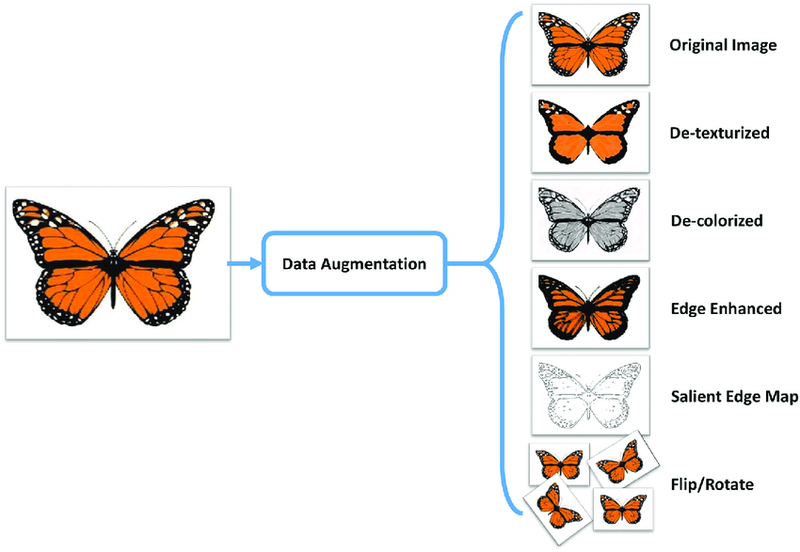

In [32]:
Image.open('./data/img.png')


> 이미지 처리를 왜 하죠?

데이터의 성능을 높이는 방법에는 여러가지가 있습니다. 대표적인 방법으로는 **Validation data**를 두는 방법과 **Data Augmentation**이 있어요. Validation Data는 자주 설명했으니 제외하고, Data Augmentation을 생각해봅시다.

**Data Augmentation**이란 원래의 데이터를 부풀려서 성능을 더 좋게 하는 방법이에요. 이미지로 예를 들자면 좌우반전, 이미지 잘라주기, 밝기조절 등이 있죠. 원본에 추가되는 개념이니 성능도 떨어지지 않아요. 쉽고 패턴이 정해져 있죠.

실제로 ILSVRC(이미지넷 이미지 인식 대회) 역대 알고리즘 중 많은 수가 이 방법을 사용했어요. AlexNet의 경우에는 좌우반전을 하고, 224x224이미지를 256x256로 resize 한 다음 다시 224x224로 랜덤하게 2048번 잘라 데이터를 2048배 늘렸다고 합니다. 


이렇게 모델의 성능을 높이기 위해서는 이미지 처리는 필수적입니다. 다행히, 우리는 이미지 하나하나를 포토샵으로 처리 할 필요 없어요. 파이썬의 대표적인 이미지 처리 라이브러리는 2가지가 있습니다.

- PIL (Python Image Library)
- OpenCV(Computer Vision)

이번 시간에는 **PIL**을 좀 더 집중적으로 살펴보도록 합시다.

### Pillow 설치

PIL 패키지를 먼저 설치해줍시다.

```bash
$ pip install pillow
```

그럼 예시 이미지 하나를 `./data` 폴더에 저장하고 제대로 동작해보는지 확인합시다. 

In [2]:
from PIL import Image
import os

img_path = os.path.dirname(os.path.abspath('__file__'))
img_path += r'/data/peppers.png'

im = Image.open(img_path)
print(im)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x7FEE31A18750>


잘 불러와지네요!

PIL에서 자주 사용하는 사용하는 속성들도 한번 알아봅시다.

In [3]:
# 이미지 형식 출력
print(im.format)

# 이미지 크기 출력
print(im.size)

# 이미지 mode 출력. (이미지 색 공간을 의미)
print(im.mode)

PNG
(512, 512)
RGB


사실 이건 `print(im)`을 해서 얻을 수 있었던 정보이기도 합니다. 이제 이미지를 한번 출력해봅시다.

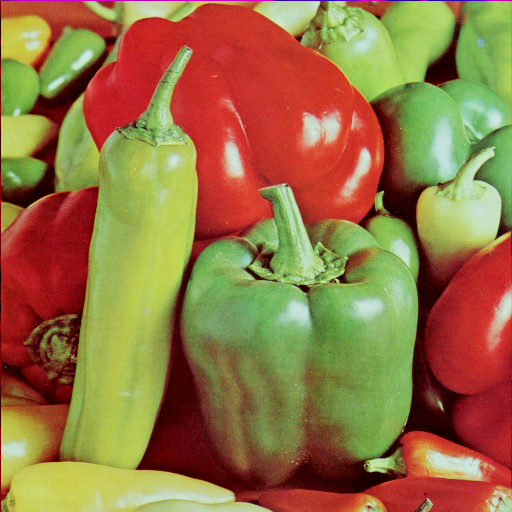

In [11]:
display(im)

이렇게 하면 새 창이 뜨면서 이미지가 뜰겁니다. 픽셀값을 한번 확인해봅시다.

In [6]:
# 한 픽셀의 RGB값을 보여줍니다.
print(im.getpixel((1, 2)))

# 전체 pixel 맵을 반환합니다.
print(im.getdata())

# 전체 픽셀들의 색공간을 쭉 보고싶다면 list()를 활용하면 됩니다. 너무 커서 창에 보이진 않습니다.
print(list(im.getdata()))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## 이미지 처리를 해봅시다. 



이제 이미지 변환을 시작해봅시다. 가장 먼저 이미지를 잘라봅시다.

### 이미지 자르기

아래의 코드를 입력해봅시다.

In [15]:
box = (100, 100, 400, 400)

box라는 튜플을 만들고 그 안에 4개의 숫자를 넣었습니다. 이는 각각 x=100, x=400, y=100, y=400 를 의미하는 직선인데, 4개의 직선을 그으면 사각형이 아래와 같이 만들어집니다.

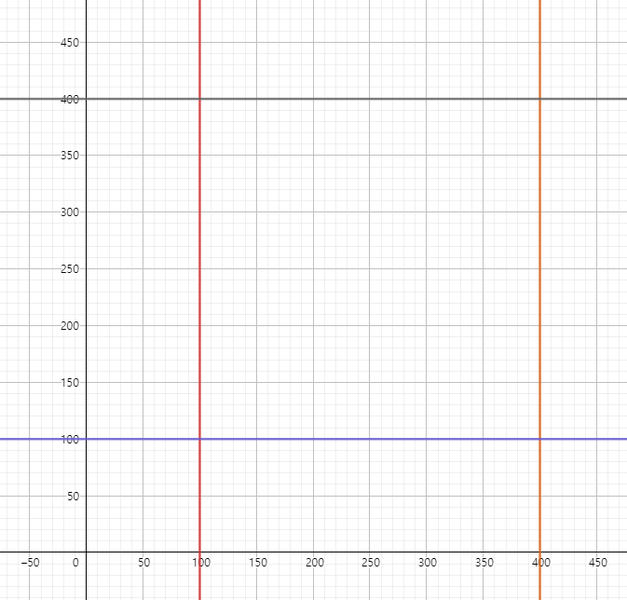

In [33]:
Image.open('./data/img2.png')

box 영역만큼 잘라봅시다.

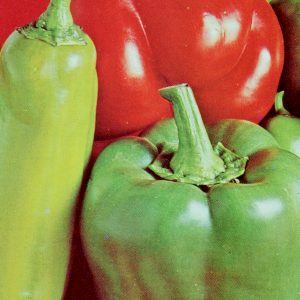

In [10]:
crop = im.crop(box)
display(crop)

새 창이 뜨면서 잘라진 사진이 나왔을 것입니다. 


### 이미지 사이즈 변경하기

사이즈를 줄이는 방법은 `resize()`를 사용하는 것입니다.

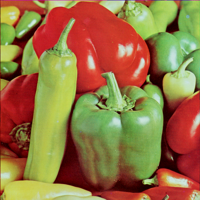

In [12]:
resized_image = im.resize((200, 200))
display(resized_image)

이미지를 자르지 않고 사이즈만 변경하는 방법입니다. `resize()` 함수 안에 바꾸고싶은 사이즈를 입력합니다. 여기서는 가로 400, 세로 400 사이즈로 바꿔주었습니다.


### 이미지 회전하기

그럼 회전도 시켜봅시다. 자른 이미지를 사용해보도록 합시다.

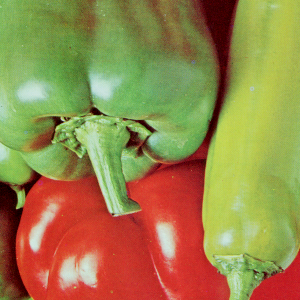

In [13]:
region = crop.transpose(Image.ROTATE_180)
display(region)

`transpose()` 함수가 이미지를 회전시키는 기능을 합니다. `Image.ROTATE_180`은 회전시키고 싶은 각도를 의미합니다. 회전 뿐만 아니라 이미지를 반전시킬수도 있습니다.

- `rotate()` 함수
    - `region = region.rotate(180)` 이런 식으로 사용합니다.
    - 180은 180도 회전하겠다는 의미입니다.
- `transpose()`함수
    - `FLIP_LEFT_RIGHT` : 이미지를 좌우반전 시킵니다.
    - `FLIP_TOP_BOTTOM` : 이미지를 상하반전 시킵니다.
    - `ROTATE_90` : 이미지를 시계 반대 방향으로 90도 돌립니다.
        - 같은 시계 반대방향 회전으로 180, 270 등이 있습니다.
        

### 이미지 합치기

이번엔 이미지를 합쳐봅시다. 원본 이미지와 잘라서 회전시킨 이미지를 각각 사용해봅시다.

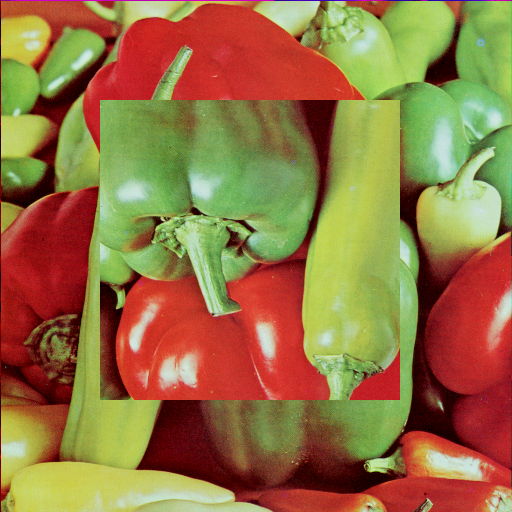

In [14]:
im.paste(region, box)
display(im)

두개 이미지를 합치면 자르고 회전시킨 이미지를 원본 이미지 중간에 들어간 구조가 됩니다.

### 이미지 대비 변경

이미지 대비(contrast)도 한번 변경해봅시다. *대비*는 물체를 다른 물체 또는 배경과 구별할 수 있도록 만들어주는 시각적인 특성차를 말합니다. 즉, 대비는 한 물체와 다른 물체의 색과 밝기의 차이로 결정됩니다. 

대비도 한번 변경해봅시다.

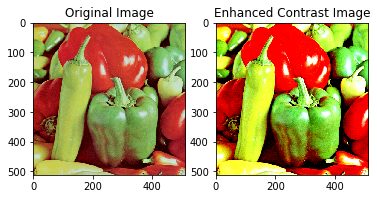

In [24]:
from PIL import ImageEnhance 
import matplotlib.pyplot as plt
%matplotlib inline

im = Image.open(img_path)

# 대비(contrast)를 하기 위한 준비 작업
enh = ImageEnhance.Contrast(im)
enh = enh.enhance(1.9) # 기존 대비보다 90% 높여주었습니다. 

f = plt.figure()
im1 = f.add_subplot(1, 2, 1)
im1.imshow(im)
im1.set_title("Original Image")

im2 = f.add_subplot(1, 2, 2)
im2.imshow(enh)
im2.set_title("Enhanced Contrast Image")
plt.show()

대비를 변경하려면 PIL 패키지에서 *ImageEnhance*라는 모듈을 가져와야 합니다.

- `enh = enh.enhance(1.9)` : 기존 대비보다 90%를 높여주었습니다. 대비를 낮추려면 1 아래로 값을 넣어주면 됩니다.


### 이미지 필터

이번에는 **필터(Filter)**를 사용해봅시다. 스노우 필터같죠?

Text(0.5, 1.0, 'BLUR filter')

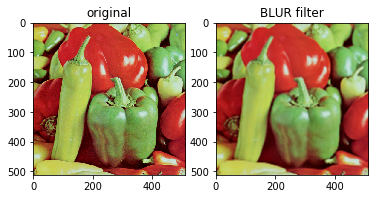

In [26]:
from PIL import ImageFilter

# 이미지를 Blur 처리
filtered_image = im.filter(ImageFilter.BLUR)

f=plt.figure()
im1 = f.add_subplot(1,2,1)
im1.imshow(im)
im1.set_title("original")

im2 = f.add_subplot(1,2,2)
im2.imshow(filtered_image)
im2.set_title("BLUR filter")

필터 종류

- `BLUR` : 이미지를 흐리게 만드는 필터입니다.
- `EDGE_ENHANCE` : 윤곽을 뚜렷하게 해주는 필터입니다.
- `EMBOSS` : 원본 이미지의 명암 경계에 따라 이미지의 각 픽셀을 밝은 영역 또는 어두운 영역으로 대체하는 필터입니다.
- `FIND_EDGES` : 윤곽만 표시해주는 필터입니다.
- `SHARPEN` : 경계선들을 더욱 날카롭게 해주어 선명도를 높이는 필터입니다.

위 코드에서 `ImageFilter.BLUR` 에서 BLUR 부분을 다른 필터로 바꾸면 적용 됩니다. (ex. `ImageFilter.EMBOSS`)

추가적으로 사용 가능한 필터는 [\[pillow docs\] ImageFilter Module](https://pillow.readthedocs.io/en/latest/reference/ImageFilter.html) 에서 확인가능합니다.


### 이미지 색 공간 변경

이미지 색 공간도 한번 바꿔봅시다.

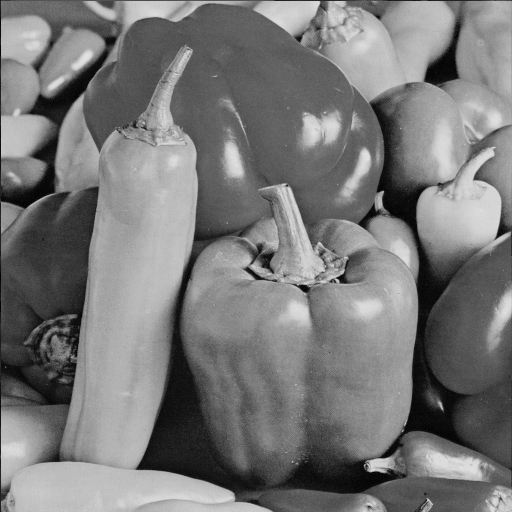

In [27]:
grey_image = im.convert("L")
display(grey_image)

`im.convert('L')` 코드가 원본 이미지의 색 공간을 변환시킵니다. 위 코드에서는 'L' 로 변경하였습니다. 예제를 실행시켜 보면 이미지가 흑백으로 변환된 것을 볼 수 있습니다.

PIL 패키지에서 지원하는 변경 가능한 색 공간은 `RGB(A)`, `CMYK`, `L` 입니다. `RGB`는 가산 혼합의 색 모형이며 빨간색, 초록색, 파란색을 원색으로 합니다. `CMYK`는 감산 혼합의 색 모형입니다. CMYK는 사이언, 마젠타, 노랑, 검정을 원색으로 합니다. `L`은 Grayscale 즉, 흑백만 있는 색 공간 입니다.

### 이미지 저장

지금까지 여러 이미지들을 살펴보았습니다. 이러저러하게 바꾼 이미지들을 저장하는 방법은 아래와 같습니다.

In [29]:
new_img_path = os.path.dirname(os.path.abspath('__file__'))
new_img_path += r'/data/new_img.jpg' # jpg가 아닌 png 등도 가능하니다.

# 이미지 저장
im.save(new_img_path)

In [36]:
from IPython.core.display import display, HTML

display(HTML("<style> .container{width:90% !important;}</style>"))